<a href="https://www.kaggle.com/code/artursouzaribeiro03/trabalhocamaradasdopython?scriptVersionId=114260482" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Notebook de Estrutura de Dados e Algoritmos de Ordenação
# Projeto Árvores

Centro de Ensino Unificado de Brasília - UniCeub

Professor: Pedro Henrique Rodrigues Mendes

2° Semestre de 2022

**Curso:** Ciência de dados e machine learning

**Alunos:** Bento Lemgruber Cesarino Barbosa - 22204167 | Guilherme Dias Barbosa - 22209454 | Artur de Souza Ribeiro - 22206898


 # Importando bibliotecas e métricas

In [1]:
import pandas as pd # Processament dos dados
import numpy as np # Operações matemáticas
from sklearn.tree import DecisionTreeClassifier # Importar classficador de árvore de decisão
from sklearn.model_selection import train_test_split # Importar função train_test_split 
from sklearn.metrics import confusion_matrix, classification_report # Importar métricas do scikit-learn para calcular matriz de confusão
from sklearn import metrics # Importar métricas do scikit-learn para calcular acurácia
import os 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/edciedadosuniceub2022/submission_template.csv
/kaggle/input/edciedadosuniceub2022/df_submission.csv
/kaggle/input/edciedadosuniceub2022/df_train.csv


# Importando dados de treino

In [2]:
treino_df = pd.read_csv('/kaggle/input/edciedadosuniceub2022/df_train.csv')
treino_df.head()

,ride_date,tavg,tmin,tmax,wspd,pres,dia_da_semana,classe
0,2018-05-09,19.8,16.0,24.4,10.8,1018.3,2,1
1,2018-05-10,18.3,14.0,24.0,14.0,1020.7,3,0
2,2018-05-11,19.7,12.9,25.1,5.9,1018.4,4,0
3,2018-05-12,19.9,13.4,25.6,5.1,1016.9,5,0
4,2018-05-13,20.0,13.9,26.4,5.9,1016.6,6,0


In [3]:
# Analisando descritores do dataframe
treino_df.describe()

,tavg,tmin,tmax,wspd,pres,dia_da_semana,classe
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,18.671765,12.341176,25.322353,7.618803,1019.001658,2.988235,0.517647
std,1.398946,2.407196,1.616388,2.210445,2.309646,2.002939,0.502654
min,15.500000,6.300000,21.800000,2.000000,1013.400000,0.000000,0.000000
25%,18.000000,10.300000,24.400000,5.900000,1017.748182,1.000000,0.000000
50%,18.800000,12.600000,25.100000,7.400000,1019.000000,3.000000,1.000000
75%,19.700000,14.400000,26.300000,9.100000,1020.600000,5.000000,1.000000
max,21.400000,17.100000,30.500000,14.000000,1023.600000,6.000000,1.000000


# Mudando colunas

In [4]:
# Renomeando algumas colunas e excluindo a coluna data
treino_df = treino_df.rename(columns = {'tavg': 'temp_media',
                                      'tmin':'temp_min',
                                      'tmax':'temp_max',
                                      'wspd':'vento',
                                      'pres':'pressao'})
treino_df.drop(columns=['ride_date'],inplace=True)
treino_df.head()

,temp_media,temp_min,temp_max,vento,pressao,dia_da_semana,classe
0,19.8,16.0,24.4,10.8,1018.3,2,1
1,18.3,14.0,24.0,14.0,1020.7,3,0
2,19.7,12.9,25.1,5.9,1018.4,4,0
3,19.9,13.4,25.6,5.1,1016.9,5,0
4,20.0,13.9,26.4,5.9,1016.6,6,0


# Histograma

array([[<AxesSubplot:title={'center':'temp_media'}>,
        <AxesSubplot:title={'center':'temp_min'}>,
        <AxesSubplot:title={'center':'temp_max'}>],
       [<AxesSubplot:title={'center':'vento'}>,
        <AxesSubplot:title={'center':'pressao'}>,
        <AxesSubplot:title={'center':'dia_da_semana'}>],
       [<AxesSubplot:title={'center':'classe'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

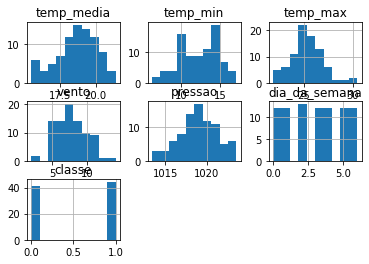

In [5]:
treino_df.hist()

# Seleção de recursos

In [6]:
# Dividir o dataset em recursos e em variável alvo
features_cols = ['temp_media', 'temp_min', 'temp_max', 'vento', 'pressao', 'dia_da_semana']
X = treino_df[features_cols] # Variáveis independentes(recursos)
Y = treino_df.classe # Variáveis dependentes(alvo)

# Dividindo os dados

In [7]:
# Dividir o dataset em se de treino e set de teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,random_state =6)# 70 % treino e 30% teste

# Modelo de árvore de decisão

In [8]:
# Criar objetivo de classificação da árvore de decisão
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth=2, min_impurity_decrease=0.0, min_samples_split=2)

# Treinar classificador de árvore de decisão
dtc = dtc.fit(X_train,Y_train)

# Predizer a resposta pro teste
Y_pred = dtc.predict(X_test)

# Avaliando o modelo

In [9]:
# Acurácia do modelo
print("Acurácia do teste:",metrics.accuracy_score(Y_test, Y_pred))

Acurácia do teste: 0.8846153846153846


In [10]:
print("Acurácia do treino:",metrics.accuracy_score(Y_train,dtc.predict(X_train)))

Acurácia do treino: 0.847457627118644


# Matriz de confusão

In [11]:
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[10,  2],
       [ 1, 13]])

In [12]:
# Analisando a quantidade de verdadeiros positivos 
Y_test.value_counts()

1    14
0    12
Name: classe, dtype: int64

In [13]:
# Frequência de falsos positivos e negativos e verdadeiros negativos
unique_elements, counts_elements = np.unique(Y_pred,return_counts=True)
print("Frequência de valores únicos:")
print(np.asarray((unique_elements,counts_elements)))

Frequência de valores únicos:
[[ 0  1]
 [11 15]]


In [14]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.87      0.93      0.90        14

    accuracy                           0.88        26
   macro avg       0.89      0.88      0.88        26
weighted avg       0.89      0.88      0.88        26



# Visualização da árvore

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 498.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=eef634c3fcb2b27ea2b8721812bf66e68b6965c267f9242517d200767d81fc55
  Stored in directory: /root/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus


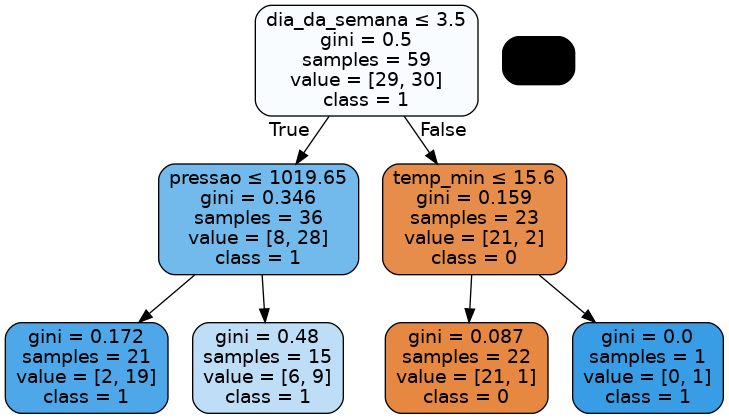

In [15]:
# Importando biblitoecas para a visualização
!pip install graphviz
!pip install pydotplus
!pip install six
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('bicicletas.png')
Image(graph.create_png())

In [16]:
# Carga dos Dados
# Dados de teste
df_sub = pd.read_csv('/kaggle/input/edciedadosuniceub2022/df_submission.csv')
# Template para submissão
template_sub = pd.read_csv('/kaggle/input/edciedadosuniceub2022/submission_template.csv')
df_sub.head()

,ride_date,tavg,tmin,tmax,wspd,pres,dia_da_semana
0,2018-08-02,21.4,13.1,29.9,5.6,1013.5,3
1,2018-08-03,21.9,14.3,30.1,6.7,1012.8,4
2,2018-08-04,22.1,14.0,30.7,5.1,1012.0,5
3,2018-08-05,22.5,15.1,30.9,5.8,1011.8,6
4,2018-08-06,22.5,15.0,31.1,5.7,1012.9,0


In [17]:
df_sub.head()

,ride_date,tavg,tmin,tmax,wspd,pres,dia_da_semana
0,2018-08-02,21.4,13.1,29.9,5.6,1013.5,3
1,2018-08-03,21.9,14.3,30.1,6.7,1012.8,4
2,2018-08-04,22.1,14.0,30.7,5.1,1012.0,5
3,2018-08-05,22.5,15.1,30.9,5.8,1011.8,6
4,2018-08-06,22.5,15.0,31.1,5.7,1012.9,0


In [18]:
template_sub.head()

,index,classe
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN


In [19]:
# Temos que aplicar as mesmas alterações que foram feitas da base de treino
# e tambem aplicar na de teste (sub_df)

# Renomeando algumas colunas e excluindo a coluna data
df_sub = df_sub.rename(columns = {'tavg': 'temp_media',
                                      'tmin':'temp_min',
                                      'tmax':'temp_max',
                                      'wspd':'vento',
                                      'pres':'pressao'})
df_sub.drop(columns=['ride_date'],inplace=True)
df_sub.head()

,temp_media,temp_min,temp_max,vento,pressao,dia_da_semana
0,21.4,13.1,29.9,5.6,1013.5,3
1,21.9,14.3,30.1,6.7,1012.8,4
2,22.1,14.0,30.7,5.1,1012.0,5
3,22.5,15.1,30.9,5.8,1011.8,6
4,22.5,15.0,31.1,5.7,1012.9,0


In [20]:
# Predição da base de teste com o modelo treinado
predicao_final = dtc.predict(df_sub)

In [21]:
template_sub.head()

,index,classe
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN


In [22]:
# Vamos inserir os valores preditos no template de submissão
template_sub['classe'] = predicao_final

In [23]:
template_sub.head()

,index,classe
0,0,1
1,1,0
2,2,0
3,3,0
4,4,1


In [24]:
# Criando o arquivo de submissão.
template_sub.to_csv('submission.csv', index=False)